In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

In [54]:
nus = ['nue','numu','nuebar','numubar']
interp_fluxes=[]
for nu in nus:
    e, f = np.genfromtxt(f"{nu}_FHC.dat", unpack=True)
    finter = interp1d(e,f, bounds_error=False, fill_value=0.0)
    interp_fluxes.append(finter)


1.7e+05
1.02e+07
6.84e+03
1.63e+04


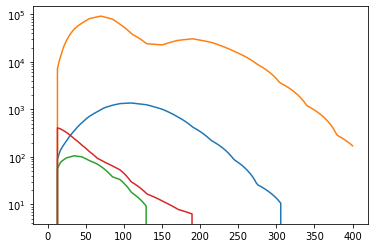

In [55]:
enu = np.linspace(1,400,200)
fluxes=[]
for f in interp_fluxes:
    plt.plot(enu, f(enu)/enu/1e6*690e6*6e23*1e-38*enu*3e18/(3e2**2))
    fluxes.append(f(enu)/enu/1e6/(3e2**2))

for f in interp_fluxes:
    print(f"{np.sum(f(enu)/1e6*690e6*6e23*1e-38*3e18/(3e2**2))*(enu[1]-enu[0]):.3g}")

plt.yscale("log")

In [64]:
zeros=np.zeros(np.size(fluxes[0]))
data=np.stack((enu,fluxes[0],fluxes[1],zeros,fluxes[2],fluxes[3],zeros),axis=0)

In [85]:
np.savetxt('nutev_fhc.dat', data.T, header='Enu (GeV) nue numu nutau nuebar numubar nutaubar (all in nus/cm^2/GeV/POT)')

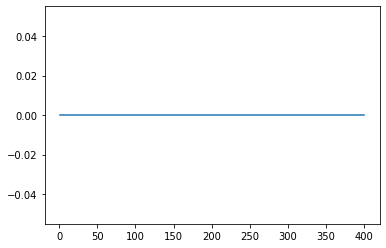

In [86]:
d=np.loadtxt('nutev_fhc.dat')

plt.plot(d[:,0],d[:,3])